__<h3>Author: IDIKA, UDUMA UDUMA</h3>__

__<h3>Major: Data Management and Artificial Intelligence</h3>__

__<h3>Topic: Building a Neural Network from Scratch using JAX</h3>__

__<h3>Objective:</h3>__

**Development of a Two-Layer Classification Neural Network from Scratch using JAX.**

I achieved this via the following steps:

Step 1: Defining the Neural Network Architecture  
Step 2: Initializing Weights and Biases <br>
Step 3: Implementing the Forward Pass <br>
Step 4: Defining the Loss Function <br>
Step 5: Implementing the Backpropagation Algorithm <br>
Step 6: Updating Model Parameters (Weights and Biases) using Gradient Descent <br>
Step 7: Training Loop Implementation <br>
Step 8: Evaluating Model Performance <br>
Step 9: Evaluating Model Accuracy on Test Set <br>

In addition, I developed a Polynomial Basis function as a function approximation model for features transformation 
before feeding the features through a neural network architecture.


In [5]:
#Importing the necessary libraries
import jax
import jax.numpy as jnp
from jax import grad
import jax.random as random
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

**<h3>Part A: Development of a Polynomial Basis Function for Features Transformation</h3>**

In [7]:
#Step 1: Understanding and Defining the Iris Dataset

#The Iris dataset contains measurements of iris flowers from three different species, namely:
# - Setosa (label 0)
# - Versicolor (label 1)
# - Virginica (label 2)

#The target variable in the dataset represents the species of the iris flower based on the three target classes above.

#The dataset includes four features (attributes) for each flower, which are:
# - Sepal Length: Length of the sepal in centimeters.
# - Sepal Width: Width of the sepal in centimeters.
# - Petal Length: Length of the petal in centimeters.
# - Petal Width: Width of the petal in centimeters.

# Load the Iris dataset
iris = load_iris()

x_iris = iris.data       #Features
y_iris = iris.target

#Splitting the data into train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size = 0.3, random_state=42)

degree = 2     #Degree of the polynomial

#Step 2: Defining the Polynomial features
def poly_features(x, degree):
    return jnp.column_stack([x**i for i in range(0, degree+1)])

x_poly_train = poly_features(x_train, degree)
x_poly_test = poly_features(x_test, degree)

**<h3>Part B: Development of a Neural Network Model</h3>**

**Note: This Neural Network Implementation is for a 2-layer neural network**

In [10]:
#Step 1:
#Define an initialization function for the weights

def initialization_fn(key, shape):
        return random.normal(key, shape) * jnp.sqrt(2/shape[0])   #He initialization for ReLU activation

class NeuralNetwork:
    
    def __init__(self, key, input_dim, hidden_dim, output_dim):
        #Define the parameters of the network
        key1, key2 = random.split(key, num=2)
        
        self.W1 = initialization_fn(key1, (input_dim, hidden_dim))
        self.b1 = jnp.zeros(hidden_dim,)                                #biases are initialized to zero

        self.W2 = initialization_fn(key2, (hidden_dim, output_dim))
        self.b2 = jnp.zeros(output_dim,)


    def forward_pass(self, x):
        z1 = jnp.dot(x, self.W1) + self.b1     #pre-activation of the hidden layer
        h = jax.nn.relu(z1)                    #applying ReLU activation for the hidden layer

        z2 = jnp.dot(h, self.W2) + self.b2     #pre-activation of the output layer
        y_pred = jax.nn.softmax(z2)            #applying Softmax to get the probabilities of the predicted target

        return y_pred

x = x_poly_train
y = y_train

#Creating an instance of the NeuralNetwork class
main_key = random.PRNGKey(42)
input_dim = x.shape[1]
hidden_dim = 12                              #Numboer of neurons in the hidden layer
output_dim = jnp.unique(y_iris).size         #Number of neurons in the output layer corresponds to the number of distinct classes in the target

nn = NeuralNetwork(key=main_key, input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)  #The _dim here refers to the number of neurons in each layer

#Wrapping the parameters in a "params" dictionary
params = {
    "W1": nn.W1,
    "b1": nn.b1,
    "W2": nn.W2,
    "b2": nn.b2
}


# Convert the target to One-Hot Encoding to obtain y_true
num_classes = jnp.unique(y_iris).size
y_true = jnp.eye(num_classes)[y_train]

#Determine initial y_pred from the initial weights and bias initialization
y_pred = nn.forward_pass(x)

#Printing the shapes of the model's parameters
print("\nModel Architecture:")
for k,v in params.items():
    print(f"{k}: {v.shape}")


#Defining the loss function (cross-entropy)
def cross_entropy_loss(y_true, y_pred):
    return -jnp.mean(jnp.sum(y_true * jnp.log(y_pred + 1e-8), axis=1))   #Added 1e-8 to avoid log(0) that causes instability

#Defining the loss function wrapper to compute the gradient using the loss function
def loss_func(params, x, y_true):
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]
    
    z1 = jnp.dot(x, W1) + b1     #pre-activation of the hidden layer
    h = jax.nn.relu(z1)          #applying ReLU activation for the hidden layer

    z2 = jnp.dot(h, W2) + b2     #pre-activation of the output layer
    y_pred = jax.nn.softmax(z2)
    
    return cross_entropy_loss(y_true, y_pred)

#Automatically determining the gradients during backpropagation
grads = grad(loss_func)(params, x, y_true)

#Printing the initial values of the Model's parameters (params)
print("\nInitial Model Parameters:")
for k, v in params.items():
    print(f"{k}: {v}\n")


Model Architecture:
W1: (12, 12)
b1: (12,)
W2: (12, 3)
b2: (3,)

Initial Model Parameters:
W1: [[-2.5239918e-01 -2.1174815e-01 -2.2750594e-01  4.2111066e-01
  -2.8472772e-01 -1.5529143e-02 -1.6852786e-01  4.3425614e-01
  -1.8992077e-01  3.1830138e-01  1.5107836e-01  4.8315726e-02]
 [ 4.2937317e-01 -4.7053549e-01 -6.1278880e-01 -3.0824658e-01
  -4.7150216e-01  1.5280814e-03 -8.9916617e-01  5.1620957e-02
   4.3158033e-01  8.1605017e-01 -4.8400378e-03  7.8165710e-02]
 [-2.7019122e-01  3.4461638e-01  8.5073209e-01 -3.2515216e-01
  -1.0735965e-02  3.1049478e-01  2.3683484e-01  2.3175696e-01
   1.8891878e-01  5.3888345e-01  4.2159390e-01  3.8556099e-01]
 [-3.2152638e-01 -1.9946833e-01  5.6027436e-01 -8.4315455e-03
   8.8983225e-03 -2.1055153e-01  2.8850397e-02  4.5395754e-02
   7.4483804e-02  2.1892242e-01 -2.0953804e-01  8.6590327e-02]
 [ 4.4984636e-01 -1.7921016e-01  2.7026129e-01  5.3254926e-01
   3.0364001e-02  3.0988522e-04  1.7420000e-01  4.2272523e-01
  -3.8459611e-01 -9.3017256e-01 

**<h3>Model Parameters (Weights & Biases) Update using Gradient Descent  </h3>**

In [12]:
#Since JAX is designed for functional programming, 
#we will return updated parameters instead of modifying parameters in place

learning_rate=0.01

def update_params(params, gradients, learning_rate):
    """
    Performs a gradient descent update on the neural network parameters.
    
    Arguments:
    - params: Dictionary containing the initial model parameters (W1, b1, W2, b2).
    - gradients: Gradient function output from JAX, same structure as params.
    - learning_rate: Step size for parameter updates.
    
    Returns:
    - Updated parameters.
    """
    updated_params = jax.tree_util.tree_map(lambda p, g: p - learning_rate * g, params, gradients)
    return updated_params

#Testing the function using our existing sample data

updated_params = update_params(params, grads, learning_rate)

#Printing the initial values of the Model's parameters (params)
print("Initial Model Parameters:")
for k, v in params.items():
    print(f"{k}: {v}\n")

#Printing the values of the model's updated_parameters
print("\nUpdated Model Parameters:")
for k, v in updated_params.items():
    print(f"{k}: {v}\n")

Initial Model Parameters:
W1: [[-2.5239918e-01 -2.1174815e-01 -2.2750594e-01  4.2111066e-01
  -2.8472772e-01 -1.5529143e-02 -1.6852786e-01  4.3425614e-01
  -1.8992077e-01  3.1830138e-01  1.5107836e-01  4.8315726e-02]
 [ 4.2937317e-01 -4.7053549e-01 -6.1278880e-01 -3.0824658e-01
  -4.7150216e-01  1.5280814e-03 -8.9916617e-01  5.1620957e-02
   4.3158033e-01  8.1605017e-01 -4.8400378e-03  7.8165710e-02]
 [-2.7019122e-01  3.4461638e-01  8.5073209e-01 -3.2515216e-01
  -1.0735965e-02  3.1049478e-01  2.3683484e-01  2.3175696e-01
   1.8891878e-01  5.3888345e-01  4.2159390e-01  3.8556099e-01]
 [-3.2152638e-01 -1.9946833e-01  5.6027436e-01 -8.4315455e-03
   8.8983225e-03 -2.1055153e-01  2.8850397e-02  4.5395754e-02
   7.4483804e-02  2.1892242e-01 -2.0953804e-01  8.6590327e-02]
 [ 4.4984636e-01 -1.7921016e-01  2.7026129e-01  5.3254926e-01
   3.0364001e-02  3.0988522e-04  1.7420000e-01  4.2272523e-01
  -3.8459611e-01 -9.3017256e-01 -6.0662287e-01  1.0184039e-01]
 [-3.1671694e-01 -6.7355233e-01  3.

**<h3>Training Loop Implementation</h3>**

Epoch 0: Loss = 8.5053
Epoch 10: Loss = 0.6112
Epoch 20: Loss = 0.8464
Epoch 30: Loss = 0.4906
Epoch 40: Loss = 0.3523
Epoch 50: Loss = 0.2777
Epoch 60: Loss = 0.2391
Epoch 70: Loss = 0.2163
Epoch 80: Loss = 0.1994
Epoch 90: Loss = 0.1858

Final Model Parameters:
W1: [[-0.25239918 -0.21442063 -0.23431809  0.42006046 -0.27661458 -0.02530389
  -0.16929173  0.4220623  -0.18992077  0.31830138  0.14545351  0.04911644]
 [ 0.42937317 -0.47320792 -0.61960083 -0.3092968  -0.463389   -0.00824669
  -0.8999301   0.03942725  0.43158033  0.8160502  -0.01046493  0.07896645]
 [-0.27019122  0.34194395  0.84392005 -0.32620236 -0.00262292  0.30072016
   0.23607096  0.21956332  0.18891878  0.53888345  0.41596898  0.38636178]
 [-0.32152638 -0.20214081  0.5534623  -0.0094817   0.01701137 -0.2203263
   0.02808653  0.03320204  0.0744838   0.21892242 -0.21516289  0.08739107]
 [ 0.44984636 -0.19280404  0.23558727  0.5273466   0.04733618 -0.0628985
   0.1695396   0.3770004  -0.3845961  -0.93017256 -0.64002985  0

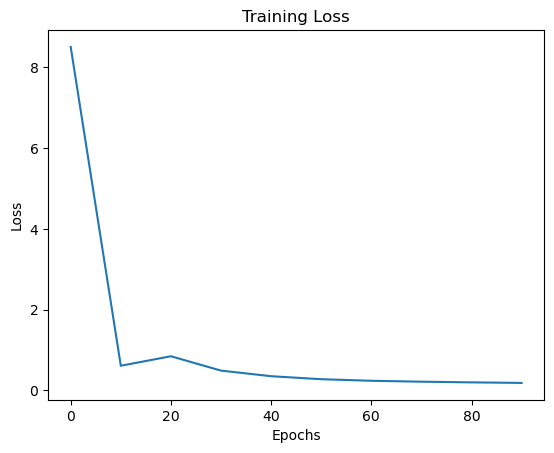

In [14]:
#This entails structuring our training process to iteratively update the parameters over multiple epochs
epochs = 100
def train_model(params, x_train, y_train, epochs, learning_rate):
    """
    Trains the neural network using gradient descent.

    Arguments:
    - params: Dictionary of initial model parameters.
    - x_train: Input training data.
    - y_train: True labels (one-hot encoded).
    - epochs: Number of iterations for training.
    - learning_rate: Step size for gradient descent.

    Returns:
    - params: Trained parameters after `epochs` iterations.
    - epoch_list: A list that contains some specified epochs
    - loss_list: A list that contains the loss for for the specified epochs
    """
    epoch_list = []
    loss_list = []
    
    for epoch in range(epochs):
        #Compute gradients
        grads = grad(loss_func)(params, x_train, y_train)

        #Update parameters
        params = update_params(params, grads, learning_rate)

        #Compute loss after 10 epochs for monitoring
        if epoch % 10 == 0:
            loss = loss_func(params, x_train, y_train)
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

            loss_value = float(loss)
            epoch_list.append(epoch)
            loss_list.append(round(loss_value, 4))

    return params, epoch_list, loss_list
        
#Testing the training loop
x_train = x.copy()
y_train = y_true.copy()

final_params, epoch_list, loss_list = train_model(params, x_train, y_train, epochs, learning_rate)

#Printing the final model parameters
print(f"\nFinal Model Parameters:")
for k, v in final_params.items():
    print(f"{k}: {v}\n")

#Visualizing the loss over the epoch
import matplotlib.pyplot as plt

#print(loss_list)
#print(epoch_list)
plt.plot(epoch_list, loss_list)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show();

**<h3>Evaluating Model Performance </h3>**

In [16]:
#Compute the final loss of the model
final_loss = loss_func(final_params, x_train, y_train)
print(f"Final Loss: {final_loss:.4f}")

#Implementing a predict function to make predictions using the final_params
def predict(params, x):
    z1 = jnp.dot(x, params["W1"]) + params["b1"]
    h = jax.nn.relu(z1)

    z2 = jnp.dot(h, params["W2"]) + params["b2"]
    y_pred = jax.nn.softmax(z2)
    return y_pred

#Prediction on training data
y_pred = predict(final_params, x_train)
print(f"\nPredicted Values: {y_pred}")

#Evaluating Model Performance
def compute_accuracy(y_pred, y_true):
    """Compute accuracy by comparing predicted and actual labels"""
    predicted_labels = jnp.argmax(y_pred, axis=1)  #Getting the class with the highest probability
    actual_labels = jnp.argmax(y_true, axis=1)     #Getting the actual class labels
    accuracy = jnp.mean(predicted_labels == actual_labels)
    return accuracy

Final Loss: 0.1756

Predicted Values: [[2.14915406e-02 8.85179520e-01 9.33289751e-02]
 [6.42684754e-04 4.22234207e-01 5.77123106e-01]
 [2.54305080e-04 1.80660397e-01 8.19085300e-01]
 [3.17153297e-02 9.33388114e-01 3.48966196e-02]
 [1.84592805e-04 6.41963407e-02 9.35619056e-01]
 [3.20539586e-02 8.34156632e-01 1.33789420e-01]
 [8.52063113e-06 3.95902321e-02 9.60401297e-01]
 [1.63524169e-02 6.24745071e-01 3.58902484e-01]
 [9.88109529e-01 1.18893292e-02 1.23171833e-06]
 [6.67391441e-06 3.90013829e-02 9.60992038e-01]
 [1.76032707e-02 9.01509583e-01 8.08871314e-02]
 [9.81796443e-01 1.82014517e-02 2.04921707e-06]
 [9.89914417e-01 1.00844083e-02 1.19446656e-06]
 [9.94339049e-01 5.66033646e-03 5.40295673e-07]
 [1.04274210e-02 7.38032341e-01 2.51540214e-01]
 [1.17614400e-03 3.54804069e-01 6.44019783e-01]
 [9.65977669e-01 3.40065956e-02 1.57988943e-05]
 [8.97695959e-01 1.02243997e-01 6.00678468e-05]
 [9.65705216e-01 3.42836492e-02 1.11190302e-05]
 [1.44197103e-02 7.53429890e-01 2.32150406e-01]
 [

In [17]:
#Computing the training accuracy
accuracy = compute_accuracy(y_pred, y_train)
print(f"\nTraining Accuracy: {accuracy * 100:.2f}%")


Training Accuracy: 98.10%


**<h3>Evaluating Model Accuracy on the Test Set</h3>**

In [19]:
#Prediction on test data
y_pred_test = predict(final_params, x_poly_test)

y_true_test = jnp.eye(num_classes)[y_test]   #One-hot encoded values of the y_test

#Computing the test accuracy
accuracy_test = compute_accuracy(y_pred_test, y_true_test)
print(f"\nTesting Accuracy: {accuracy_test * 100:.2f}%")


Testing Accuracy: 97.78%
